In [ ]:
%matplotlib inline

import os

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz, lfilter, minimum_phase

import grand.dataio.root_trees as rt

import database.tools as tools

plt.style.use('tableau-colorblind10')
plt.style.use('/pbs/home/p/pcorrea/tools/matplotlib_style_sans-serif.txt')

PLOT_COLORS = plt.rcParams['axes.prop_cycle'].by_key()['color']

Welcome to JupyROOT 6.30/04


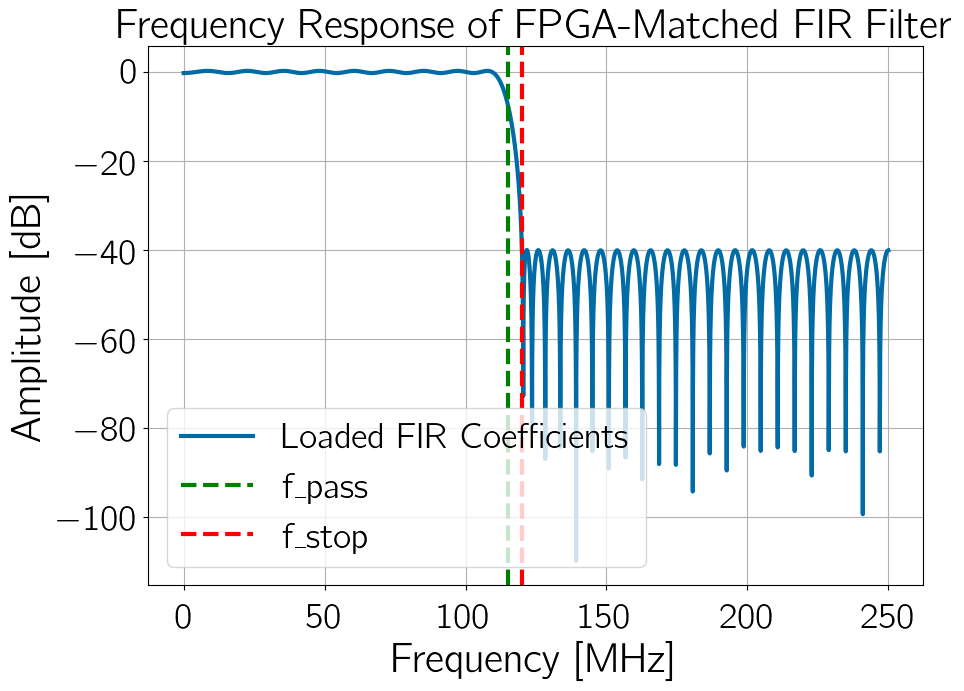

In [2]:
# Load the 83 FIR coefficients from file
coeffs = np.loadtxt('/sps/grand/pcorrea/nutrig/database/v2/lowpass115MHz.txt', delimiter=",")

# Frequency response (to match FPGA behavior)
fs = 500e6  # sampling frequency in Hz
w, h = freqz(coeffs, worN=8000, fs=fs)

# Plot frequency response
#plt.figure(figsize=(10, 4))
plt.plot(w/1e6, 20 * np.log10(abs(h)), label="Loaded FIR Coefficients")
plt.title("Frequency Response of FPGA-Matched FIR Filter")
plt.xlabel("Frequency [MHz]")
plt.ylabel("Amplitude [dB]")
plt.grid(True)
plt.axvline(115, color='g', linestyle='--', label="f_pass")
plt.axvline(120, color='r', linestyle='--', label="f_stop")
plt.legend(frameon=True)
plt.show()

In [3]:
# Test with MD
# test_file = '/sps/grand/data/gp80/GrandRoot/2025/02/GP80_20250219_160210_RUN146_MD_RAW-ChanXYZ-20dB-GP43-20hz-X2FLOAT-Y2Z-0030.root'
# tadc      = rt.TADC(test_file)
# n_entries = 100

# traces = np.zeros((n_entries,4,1024),dtype=int)

# for entry in range(n_entries):
#     tadc.get_entry(entry)

#     traces[entry] = tadc.trace_ch[0]

# Test with CD
test_file = '/sps/grand/data/gp80/GrandRoot/2025/04/GP80_20250430_171335_RUN10085_CD_20dB-GP65-OC-Y2float-CD-100000-2.root'
tadc = rt.TADC(test_file)
entry = 100

tadc.get_entry(entry)
traces = np.array(tadc.trace_ch)
du_ids = np.array(tadc.du_id)

In [ ]:
a = ['X','Y','Z']



s = np.sum(a[0:1])
s


UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U1'), dtype('<U1')) -> None

In [12]:
traces_filtered = tools.filter_traces_bandpass(traces)
traces_filtered_minimum_phase = tools.filter_traces_bandpass(traces,do_minimum_phase=True)

idx = 9
ch = 2

title = f'Entry {entry}, DU {du_ids[idx]}'
suptitle = f'{os.path.basename(test_file)}'

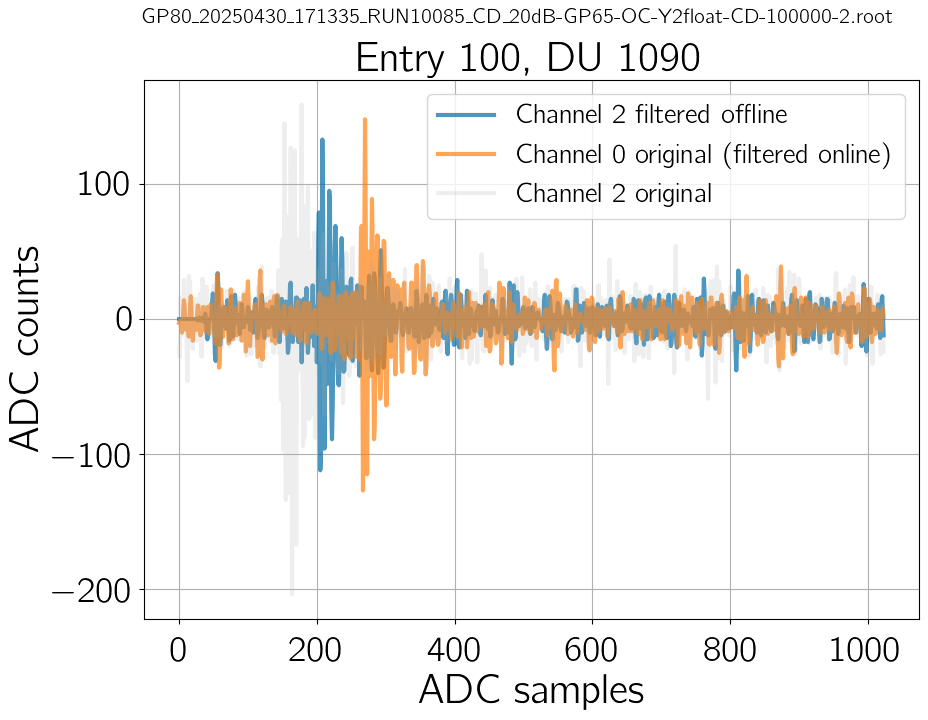

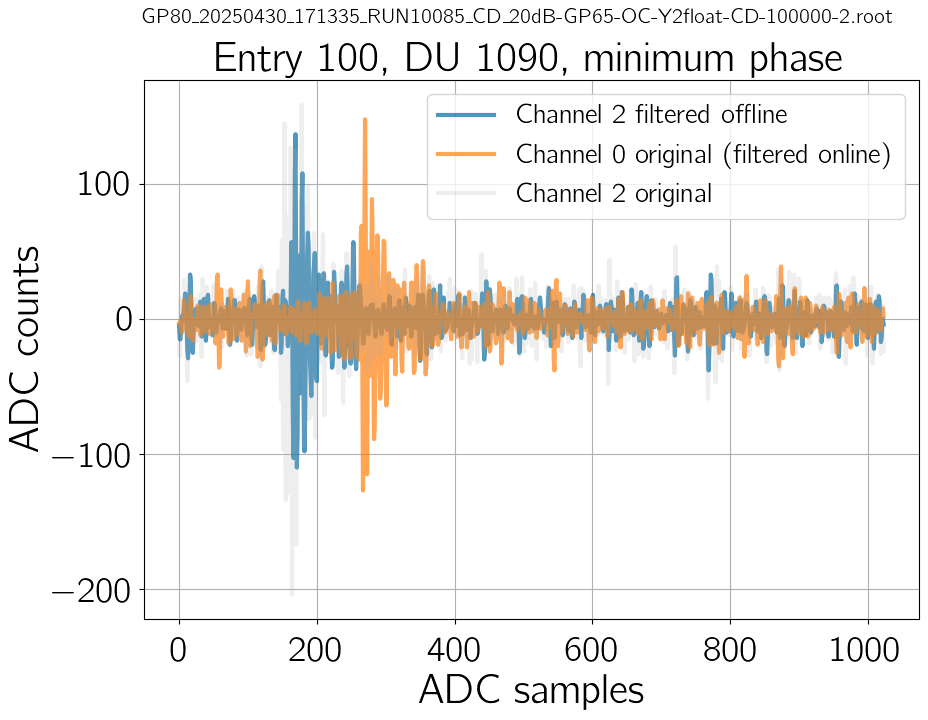

In [14]:
plt.plot(traces_filtered[idx,ch],label=f'Channel {ch} filtered offline',alpha=.7)
plt.plot(traces[idx,0],label=f'Channel 0 original (filtered online)',alpha=.7)
plt.plot(traces[idx,ch],label=f'Channel {ch} original',alpha=.2,color=PLOT_COLORS[2])
#plt.xlim([100,400])
plt.xlabel('ADC samples')
plt.ylabel('ADC counts')
plt.title(title)
plt.suptitle(suptitle,fontsize=15)
plt.legend(frameon=True,fontsize=20)
plt.show()


plt.plot(traces_filtered_minimum_phase[idx,ch],label=f'Channel {ch} filtered offline',alpha=.7)
plt.plot(traces[idx,0],label=f'Channel 0 original (filtered online)',alpha=.7)
plt.plot(traces[idx,ch],label=f'Channel {ch} original',alpha=.2,color=PLOT_COLORS[2])
#plt.xlim([100,400])
plt.xlabel('ADC samples')
plt.ylabel('ADC counts')
plt.title(title+', minimum phase')
plt.suptitle(suptitle,fontsize=15)
plt.legend(frameon=True,fontsize=20)
plt.show()

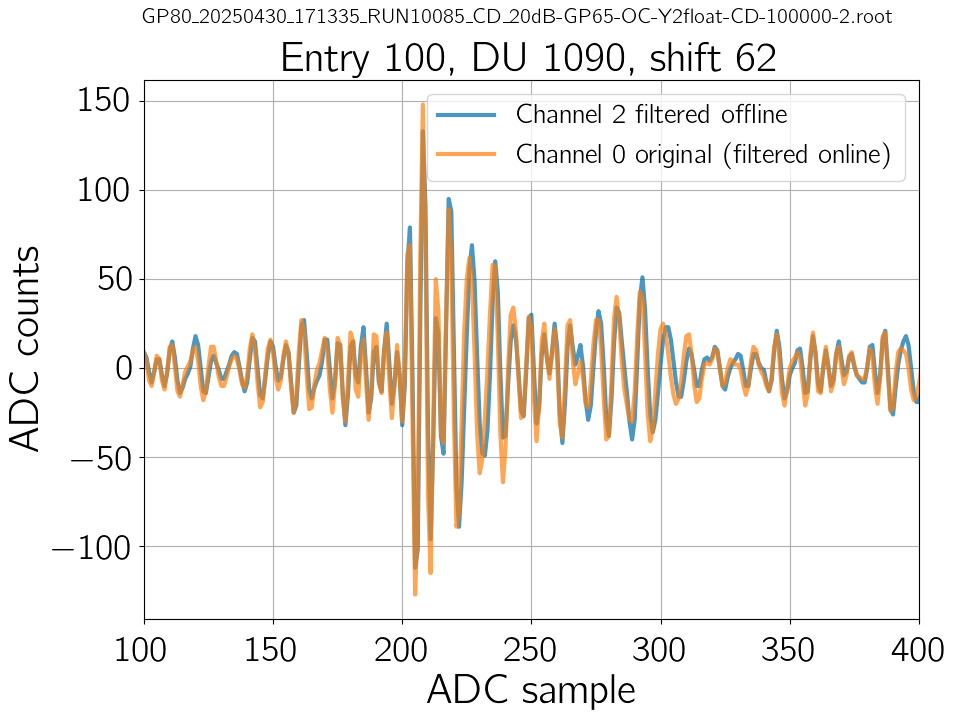

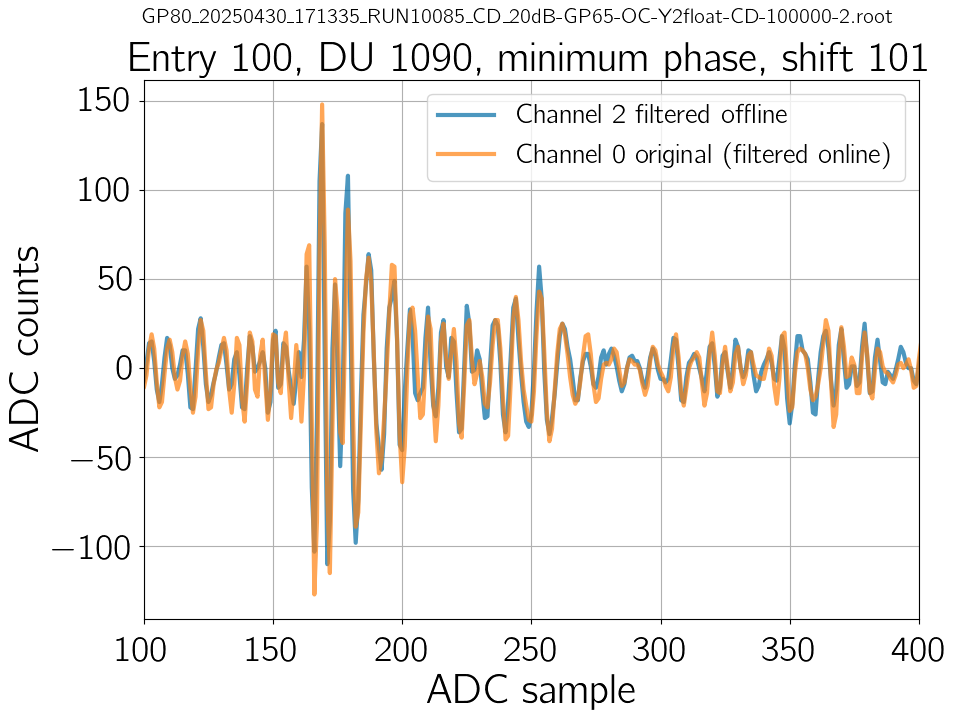

In [16]:
shift = np.argmax(traces[idx,0]) - np.argmax(traces_filtered[idx,ch])
plt.plot(traces_filtered[idx,ch],label=f'Channel {ch} filtered offline',alpha=.7)
plt.plot(traces[idx,0,shift:],label=f'Channel 0 original (filtered online)',alpha=.7)
plt.xlim([100,400])
plt.xlabel('ADC sample')
plt.ylabel('ADC counts')
plt.title(title+f', shift {shift}')
plt.suptitle(suptitle,fontsize=15)
plt.legend(frameon=True,fontsize=20)
plt.show()


shift = np.argmax(traces[idx,0]) - np.argmax(traces_filtered_minimum_phase[idx,ch])
plt.plot(traces_filtered_minimum_phase[idx,ch],label=f'Channel {ch} filtered offline',alpha=.7)
plt.plot(traces[idx,0,shift:],label=f'Channel 0 original (filtered online)',alpha=.7)
plt.xlim([100,400])
plt.xlabel('ADC sample')
plt.ylabel('ADC counts')
plt.title(title+f', minimum phase, shift {shift}')
plt.suptitle(suptitle,fontsize=15)
plt.legend(frameon=True,fontsize=20)
plt.show()

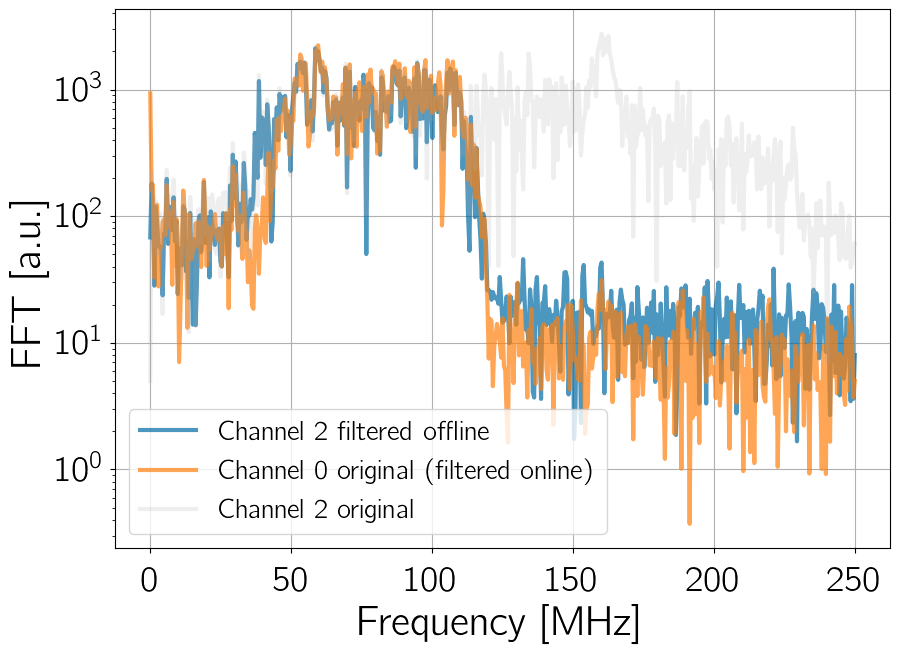

In [52]:
fft          = np.abs( np.fft.rfft(traces) )
fft_filtered = np.abs( np.fft.rfft(traces_filtered) )
freq         = np.fft.rfftfreq( traces.shape[-1] )*500 # [MHz]

plt.plot(freq,fft_filtered[idx,ch],label=f'Channel {ch} filtered offline',alpha=.7)
plt.plot(freq,fft[idx,0],label=f'Channel 0 original (filtered online)',alpha=.7)
plt.plot(freq,fft[idx,ch],label=f'Channel {ch} original',alpha=.2,color=PLOT_COLORS[2])
plt.yscale('log')
plt.xlabel('Frequency [MHz]')
plt.ylabel('FFT [a.u.]')
plt.legend(frameon=True,fontsize=20)
plt.show()